# Image Quantization for Personalized image

James Webb Space Telescope recently published new pictures. The pictures contain wonder of Universe, so I want to have personalized version of them. I choose the most favorite one and try to personalize it by image quantization using K-Means clustering method.

In [1]:
import numpy as np
import matplotlib.image as mpimg
import matplotlib.pyplot as plt

## Read Image and convert to 2d array form

In [2]:
img_as_array = mpimg.imread('Untitled.png')

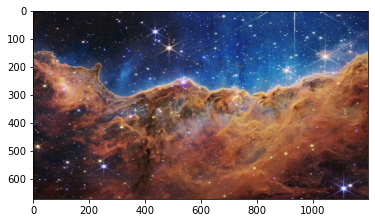

In [3]:
plt.imshow(img_as_array)

In [4]:
h,w,c = img_as_array.shape

In [5]:
img_as_array2d = img_as_array.reshape(h*w,c)
img_as_array2d

array([[0.09803922, 0.08627451, 0.09803922],
       [0.09803922, 0.08627451, 0.09803922],
       [0.09803922, 0.08627451, 0.09803922],
       ...,
       [0.18039216, 0.09803922, 0.10588235],
       [0.1882353 , 0.10588235, 0.11764706],
       [0.21176471, 0.12156863, 0.13333334]], dtype=float32)

## K-Means Clustering

In [6]:
from sklearn.cluster import KMeans

In [10]:
# Look for the optimized number of clusters
y = []
for n in range(1,17):
    model = KMeans(n_clusters=n)
    labels = model.fit_predict(img_as_array2d)
    y.append(model.score(img_as_array2d, labels))

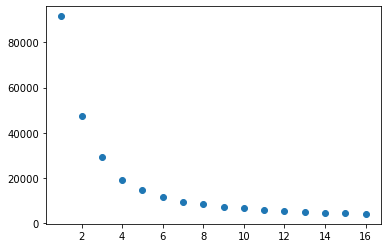

In [24]:
y=np.asarray(y)
plt.plot(range(1,17),-1*y, linewidth=0, marker='o')

In [46]:
n_candidates=[5,6,8,10,12]
imgs = []
for n in n_candidates:
    model = KMeans(n_clusters=n)
    labels = model.fit_predict(img_as_array2d)
    centers = model.cluster_centers_
    quantized_img = centers[labels].reshape(h,w,c)
    imgs.append(quantized_img)
    mpimg.imsave(f'K_Means_{n}clusters.png', quantized_img, dpi=500)

# I love the image with 10 clusters the most!
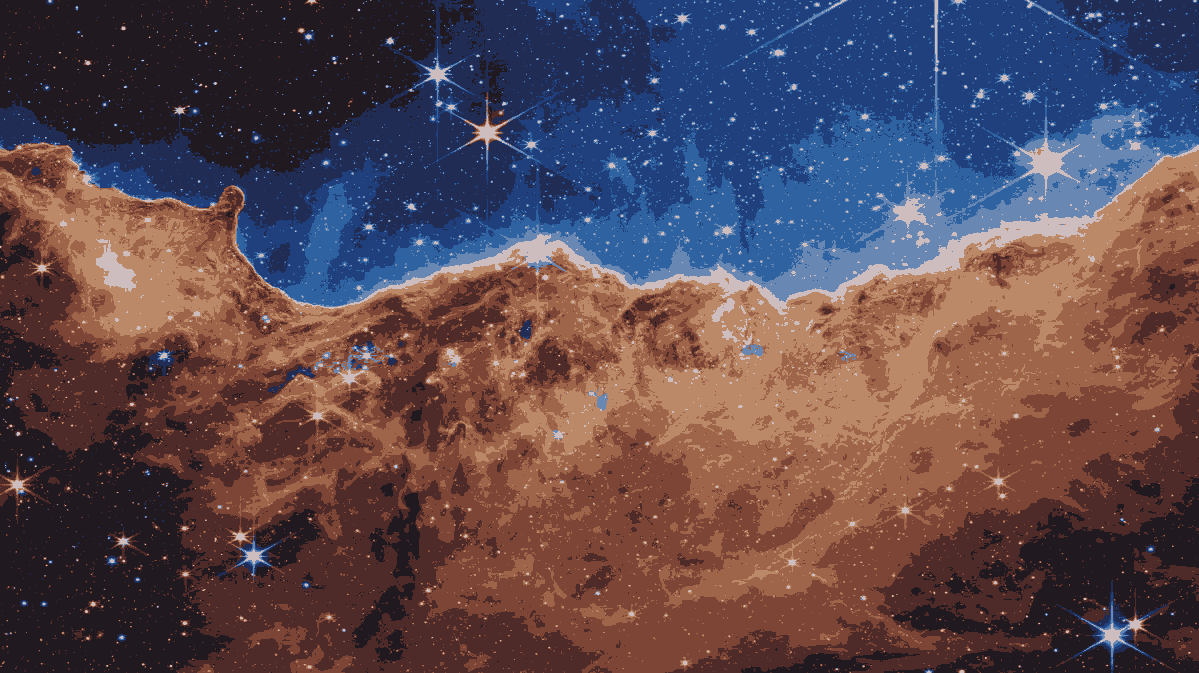